<a href="https://colab.research.google.com/github/PrzemyslawSarnacki/NumericalMethods/blob/master/Lagrange.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [69]:
import math
import matplotlib.pyplot as plt
import numpy as np 
import scipy.interpolate  
from numpy.polynomial.polynomial import Polynomial
import sympy as sym


Implementacja funkcji liczącej współczynniki Lagrange'a

In [53]:
x = sym.symbols("x")
func = sym.expand((x-3)*(x-1))
sym.Poly(func, x).coeffs()

[1, -4, 3]

In [71]:
x_arr = np.array([0, 1, 2, 4], float)
y_arr = np.array([1, 2, 2, 3], float)

array([ 0.16666667, -1.        ,  1.83333333,  1.        ])

Implementacja wyłącznie na współczynnikach (wynikiem jest równanie symboiliczne)

In [62]:
def lagrange_coef(x_arr, y_arr):
    px = 0
    # iterate through arrays
    for xi, yi in zip(x_arr, y_arr):
        # we will count numerator and denominator on each own
        # np.prod is basically just multiplying elements one by one 
        numerator = [f"(x - {x_})" for x_ in x_arr[x_arr != xi]]
        denominator = np.prod(xi - x_arr[x_arr != xi])
        # print out L
        print(f"L{np.where(x_arr == xi)[0]}(x) = {numerator} / {denominator}")
        a=x**0
        # multiply every fraction of numerator
        for num in numerator:
            a *= sym.sympify(num) 
        p_ = sym.expand(a / denominator)
        # addition of every L multiplied by yi
        px += yi * p_
    return px

Implementacja wyłącznie na wartościach liczbowych (wynikiem jest tablica zawierająca wyniki w przedziale (od min zbioru do max) )

In [72]:
def lagrange(x_arr, y_arr):
    # declare interval
    x_interval = np.linspace(x_arr[0], x_arr[-1])
    # declare output array 
    y_result = np.array([], float)
    # iterate through interval
    for xp in x_interval:
        yp=0
        # Iterate through known solutions 
        for xi, yi in zip(x_arr, y_arr):
            # calculate result for certain point
            # p is calculated by multiplying yi times x in certain point (from interval)
            yp += yi * np.prod((xp - x_arr[x_arr != xi])/(xi - x_arr[x_arr != xi]))
        # append to output array
        y_result = np.append(y_result, yp)
    return y_result

Przetestujmy funkcję zawierającą obliczenia symboliczne (jak widzimy wynikiem jest równanie)

In [63]:
lagrange_coef(x_arr, y_arr)

L[0](x) = ['(x - 1.0)', '(x - 2.0)', '(x - 4.0)'] / -8.0
L[1](x) = ['(x - 0.0)', '(x - 2.0)', '(x - 4.0)'] / 3.0
L[2](x) = ['(x - 0.0)', '(x - 1.0)', '(x - 4.0)'] / -4.0
L[3](x) = ['(x - 0.0)', '(x - 1.0)', '(x - 2.0)'] / 24.0


0.166666666666667*x**3 - 1.0*x**2 + 1.83333333333333*x + 1.0

Przetestujmy funkcję numeryczną

In [73]:
lagrange(x_arr, y_arr)

array([1.        , 1.14308664, 1.27338949, 1.39145254, 1.49781979,
       1.59303521, 1.67764282, 1.75218659, 1.81721052, 1.87325859,
       1.92087481, 1.96060315, 1.99298762, 2.01857219, 2.03790087,
       2.05151765, 2.05996651, 2.06379145, 2.06353645, 2.05974551,
       2.05296263, 2.04373178, 2.03259696, 2.02010217, 2.00679139,
       1.99320861, 1.97989783, 1.96740304, 1.95626822, 1.94703737,
       1.94025449, 1.93646355, 1.93620855, 1.94003349, 1.94848235,
       1.96209913, 1.98142781, 2.00701238, 2.03939685, 2.07912519,
       2.12674141, 2.18278948, 2.24781341, 2.32235718, 2.40696479,
       2.50218021, 2.60854746, 2.72661051, 2.85691336, 3.        ])

Sprawdźmy czy obliczenia były poprawne przy pomocy funkcji z biblioteki SciPy

In [74]:
poly = scipy.interpolate.lagrange(x_arr, y_arr)
coefs = Polynomial(poly).coef
# whole equation 
print(np.poly1d(poly))
# y value of the last element
np.polyval(coefs, x_arr[-1])

3     2
0.1667 x - 1 x + 1.833 x + 1


2.9999999999999964

Porównanie powyższych działań na wykresie 

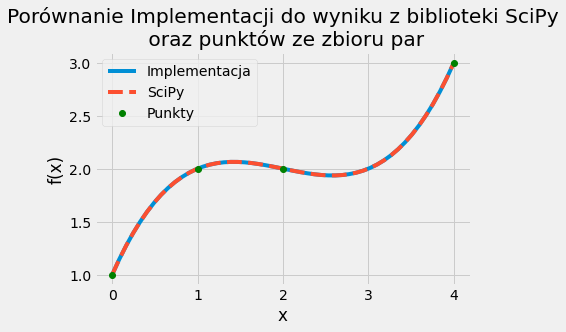

In [88]:
plt.style.use('fivethirtyeight')

interval = np.linspace(x_arr[0], x_arr[-1])
plt.plot(interval, lagrange(x_arr, y_arr))
plt.plot(interval, np.polyval(coefs, interval), linestyle='dashed')
plt.plot(x_arr, y_arr, "o", color="green")
plt.title("Porównanie Implementacji do wyniku z biblioteki SciPy\n oraz punktów ze zbioru par")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend(["Implementacja", "SciPy", "Punkty"])

Szereg Taylora w większym przedziale zgadza się z funkcją cos(x) niż jest to w przypadku Maclaurina